<a href="https://colab.research.google.com/github/bbandbass/Study/blob/main/chp2_%EC%9E%90%EC%97%B0%EC%96%B4%EC%99%80_%EB%8B%A8%EC%96%B4%EC%9D%98_%EB%B6%84%EC%82%B0_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단어 표현 기법

## 시소러스
동의어나 유의어를 한 그룹으로 분류하여 컴퓨터에게 자연어를 이해시키려 한 기법  
이에 그치치 않고 단어 사이의 상하위, 전체와 부분 등의 관계까지 정의해둔 경우도 존재

* 시소러스의 문제점 
  * 사람이 수작업으로 계층 구조, 관계 등을 레이블링 해주어야함
  * 시대 변화에 대응하기 어렵다(단어가 사라지기도 하고 신조어가 생기기도 함)
  * 사람을 쓰는 비용이 크다
  * 비슷한 단어들이라 하여도 미묘한 차이가 존재하는 법인데, 이러한 차이를 표현하지는 못한다

## 통계 기반 기법
텍스트 데이터로부터 자동으로 단어의 의미를 추출하여 사람이 손수 단어를 연결지을 필요가 없음  
목표: 사람의 지식으로 가득한 말뭉치에서 자동으로, 효율적으로 그 핵심을 추출하는 것




### 파이썬으로 말뭉치 전처리하기

In [1]:
text = "You say goodbye and I say hello."

In [2]:
text = text.lower()
text = text.replace('.', ' .') # 후에 split하기 위해
text

'you say goodbye and i say hello .'

In [3]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [4]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

In [5]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [6]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [7]:
id_to_word[1]

'say'

In [8]:
word_to_id['hello']

5

In [9]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [10]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.', ' .')
  words = text.split(' ')

  word_to_id = {}
  id_to_word = {}

  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])
  
  return corpus, word_to_id, id_to_word

In [11]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

### 단어의 분산 표현
단어의 의미를 정확하게 파악할 수 있는 벡터 표현  
분포 가설: 단어의 의미는 주변 단어에 의해 형성된다. 단어 자체에는 의미가 없고, 그 단어가 사용된 맥락이 의미를 형성한다.  
통계 기법: 어떤 단어에 주목했을 때 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법


In [13]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


co-occurrence matrix: 각 단어의 맥락(윈도우 크기 = 1)에 해당하는 단어의 빈도를 나타내 벡터로 표현한 것

In [14]:
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0],
], dtype = np.int32)

In [15]:
print(C[0]) # ID가 0인 단어의 벡터 표현
print(C[4]) # ID가 4인 단어의 벡터 표현
print(C[word_to_id['goodbye']]) # 'goodbye'의 벡터 표현

[0 1 0 0 0 0 0]
[0 1 0 1 0 0 0]
[0 1 0 1 0 0 0]


In [18]:
# co-occurence matrix 만드는 함수
def create_co_matrix(corpus, vocab_size, window_size = 1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32) 

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1): # i = 1 if window_size = 1
      left_idx = idx - i
      right_idx = idx + i

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1 # word_id번째 행, left_word_id번째 열의 값을 1로

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1
  
  return co_matrix

In [20]:
# cosine similarity 구하는 함수
def cos_similarity(x, y, eps = 1e-8):
  # 분모가 0이 되면 0으로 나누기 오류가 발생하기 때문에 분모에 작은 값 eps를 더해줌
  nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
  ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
  return np.dot(nx, ny) 

In [21]:
# you와 i의 유사도 구하기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']] # 'you'의 단어 벡터
c1 = C[word_to_id['i']] # i의 단어 벡터

print(cos_similarity(c0, c1)) # 'you'와 'i'의 코사인 유사도
# -1과 1 사이의 값으로 1이면 같은 방향 -1이면 반대 방향

0.7071067691154799


In [25]:
# 검색어로 주어진 단어와 비슷한 단어를 유사도 순으로 출력하는 함수
def most_similar(query, word_to_id, id_to_word, word_matrix, top = 5):
  # 검색어 꺼내기
  if query not in word_to_id:
    print('%s(을)를 찾을 수 없습니다.' % query)
    return 
  
  print('\n[query] ' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos_similarity(word_matrix[i], query_vec)
  
  count = 0
  for i in (-1 * similarity).argsort(): # 내림차순으로 출력
    if id_to_word[i] == query:
      continue
    print(' %s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top: # count가 top을 넘으면 끝
      return

In [23]:
x = np.array([100, -20, 2])
print(x.argsort()) # argsort는 array를 오름차순 정렬 따라서 1(-20), 2(2), 0(100) 순으로 정렬된 것
# 높은 순서부터, 즉, 내림차순으로 정렬하기 위해 마이너스를 곱한 이후 argsort()
print((-x).argsort())

[1 2 0]
[0 2 1]


In [26]:
# you와 가장 유사한 단어들 출력
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top = 5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


## 통계 계산 기법 개선하기

### PPMI

In [48]:
def ppmi(C, verbose = False, eps = 1e-8):
  M = np.zeros_like(C, dtype = np.float32)
  N = np.sum(C) # 동시발생행렬의 모든 1의 합
  S = np.sum(C, axis = 0) # 특정 단어의 발생 빈도
  total = C.shape[0] * C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j] * S[i]) + eps)
      M[i, j] = max(0, pmi)

      if verbose:
        cnt += 1
        if cnt % (total//100 + 1) == 0:
          print('%.1f%% 완료' % (100 * cnt/total))

  return M

In [36]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision = 3) # 유효 자리수를 3자리로 표시
print('동시발생 행렬')
print(C)
print('-' * 50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


하지만 PPMI도 여전히 말뭉치의 단어의 수가 증가함에 따라 벡터의 차원도 증가한다는 문제가 존재함.  
또한, 행렬의 원소 대부분이 0인데, 즉, 원소 대부분이 중요하지 않음을 의미함.  
이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 지님
  
이렇게 원소 대부분이 0인 행렬이나 벡터를 sparse matrix/vector라 함

## 차원 감소

### SVD에 의한 차원 감소

In [37]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

U, S, V = np.linalg.svd(W)

In [38]:
print(C[0])
print(W[0])
print(U[0])

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 3.409e-01 -1.110e-16 -1.205e-01 -4.163e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


U(밀집벡터의 차원) 감소시키기, 즉 truncated SVD하기

In [39]:
# 2차원 벡터로 줄이기
print(U[0, :2])

[ 3.409e-01 -1.110e-16]


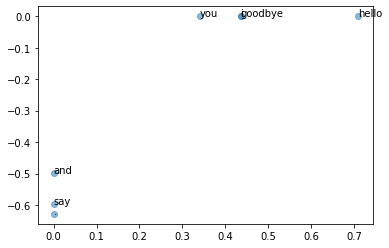

In [42]:
import matplotlib.pyplot as plt
# 각 단어를 2차원 벡터로 표현 후 그래프로 그려보기
for word, word_id in word_to_id.items():
  plt.annotate(word, (U[word_id, 0], U[word_id, 1]))

plt.scatter(U[:, 0], U[:, 1], alpha = 0.5)
plt.show()

### PTB 데이터셋에 지금까지 공부한 내용 적용해보기

In [43]:
import sys
sys.path.append('..')
%cd /content/drive/MyDrive/밑바닥부터 시작하는 딥러닝2
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

/content/drive/MyDrive/밑바닥부터 시작하는 딥러닝2
Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [50]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산...')
C = create_co_matrix(corpus, vocab_size, window_size)
print("PPMI 계산...")
W = ppmi(C, verbose = True)

print('SVD 계산...')
try:
  # trucnated SVD(빠르다)
  from sklearn.utils.extmath import randomized_svd
  # np.linalg.svd()를 사용해도 되지만, 시간이 오래 걸리고 메모리도 훨씬 많이 사용하기 때문에
  # 비교적 큰 행렬에 SVD를 적용해야 하는 경우에는 sklearn의 SVD를 사용
  U, S, V = randomized_svd(W, n_components = wordvec_size, n_iter = 5, random_state = None)

except ImportError:
  # SVD(느리다)
  U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
  most_similar(query, word_to_id, id_to_word, word_vecs, top = 5)

동시발생 수 계산...
PPMI 계산...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
SVD 계산...

[query] you
 i: 0.7034521102905273
 we: 0.6689209938049316
 do: 0.5704985857009888


randomized_svd이기 때문에, 그 결과는 매번 다를 수 있다.